# Trends in Car Accident Data

In this project, I used a dataset from Kaggle about car accidents in the United Kingdom from 2005 to 2015. 

# Global: Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import time
import pylab

# Data Wrangling

### Exploring and Selecting Columns

In [2]:
# import data into Python
Accidents = pd.read_csv('/Users/jlmac01/Downloads/Accidents0515.csv')

In [3]:
Accidents.shape

(1780653, 32)

In [4]:
# view a few rows of data
Accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [5]:
Accidents.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [6]:
# select columns I am interested in analyzing
New_Accidents = Accidents.iloc[:,[6,7,8,10,11,16,17, 19, 22, 23, 24, 25, 26, 27, 28]]

In [7]:
New_Accidents.shape

(1780653, 15)

In [8]:
New_Accidents.columns

Index(['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', 'Time', 'Road_Type', 'Speed_limit', 'Junction_Control',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards'],
      dtype='object')

In [9]:
# there are a few column names that are a little difficult to work with
New_Accidents.iloc[:,[8,9]].head(0)

,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities


In [10]:
# fix column names
New_Accidents = New_Accidents.rename(columns={New_Accidents.columns[8]: "Pedestrian_Crossing_Human", 
                                              New_Accidents.columns[9]: "Pedestrian_Crossing_Physical"},)

In [11]:
# verify new column names are correct
New_Accidents.iloc[:,[8,9]].head(0)

,Pedestrian_Crossing_Human,Pedestrian_Crossing_Physical


### Removing Missing Values

In [12]:
# see if there are null values
New_Accidents.isnull().sum()

Accident_Severity                 0
Number_of_Vehicles                0
Number_of_Casualties              0
Day_of_Week                       0
Time                            151
Road_Type                         0
Speed_limit                       0
Junction_Control                  0
Pedestrian_Crossing_Human         0
Pedestrian_Crossing_Physical      0
Light_Conditions                  0
Weather_Conditions                0
Road_Surface_Conditions           0
Special_Conditions_at_Site        0
Carriageway_Hazards               0
dtype: int64

In [13]:
# replace -1 data with NaN
# if data was -1, it means the data was missing or out of range
New_Accidents.Junction_Control.replace(-1, np.NaN, inplace=True)
New_Accidents.Pedestrian_Crossing_Human.replace(-1, np.NaN, inplace=True)
New_Accidents.Pedestrian_Crossing_Physical.replace(-1, np.NaN, inplace=True)
New_Accidents.Weather_Conditions.replace(-1, np.NaN, inplace=True)
New_Accidents.Road_Surface_Conditions.replace(-1, np.NaN, inplace=True)
New_Accidents.Special_Conditions_at_Site.replace(-1, np.NaN, inplace=True)
New_Accidents.Carriageway_Hazards.replace(-1, np.NaN, inplace=True)

In [14]:
# confirm -1 data points were converted to NaN
New_Accidents.isnull().sum()

Accident_Severity                    0
Number_of_Vehicles                   0
Number_of_Casualties                 0
Day_of_Week                          0
Time                               151
Road_Type                            0
Speed_limit                          0
Junction_Control                641392
Pedestrian_Crossing_Human          161
Pedestrian_Crossing_Physical       164
Light_Conditions                     0
Weather_Conditions                 161
Road_Surface_Conditions           2439
Special_Conditions_at_Site         124
Carriageway_Hazards                127
dtype: int64

In [15]:
# delete all rows that contain a NaN
New_Accidents.dropna(inplace=True)

In [16]:
# confirm NaN rows were dropped
New_Accidents.isnull().sum()

Accident_Severity               0
Number_of_Vehicles              0
Number_of_Casualties            0
Day_of_Week                     0
Time                            0
Road_Type                       0
Speed_limit                     0
Junction_Control                0
Pedestrian_Crossing_Human       0
Pedestrian_Crossing_Physical    0
Light_Conditions                0
Weather_Conditions              0
Road_Surface_Conditions         0
Special_Conditions_at_Site      0
Carriageway_Hazards             0
dtype: int64

In [17]:
New_Accidents.shape

(1137462, 15)

### Removing Duplicates

In [18]:
# remove duplicates
New_Accidents.drop_duplicates(inplace=True)

In [19]:
New_Accidents.shape

(699258, 15)

### Converting Time Data
The compiler was unable to handle the format of the Time data. To correct this issue, I converted the Time data to a time data type.

In [20]:
New_Accidents['Time'].dtype

dtype('O')

In [21]:
# fix time - needs to be a datatype that can be operated on with matplotlib
New_Accidents['Time'] = pd.to_datetime(New_Accidents['Time'])

In [22]:
New_Accidents['Time'].dtype

dtype('<M8[ns]')

# Data Analysis
Data visualization allowed me to observed trends in my data. 

### Charts for Variables Unrelated to Driving Conditions

Text(0,0.5,'')

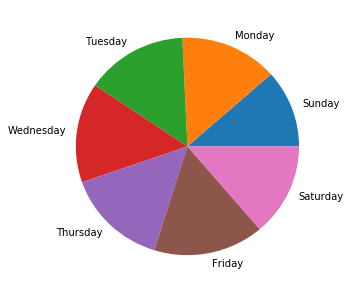

In [48]:
# pie chart of Day_of_Week
Day_of_Week_group = New_Accidents.groupby('Day_of_Week').size()
Day_of_Week_group
Day_of_Week_group.rename(index={1: "Sunday", 2: "Monday", 3: "Tuesday", 4: "Wednesday", 5: "Thursday",
                               6: "Friday", 7: "Saturday"}, inplace = True)
Day_of_Week_group
plot = Day_of_Week_group.plot.pie(subplots=True, figsize=(5,5))
pylab.ylabel('') # remove the y label

From the pie chart about day of the week, we see each day of the week has approximately the same number of car accidents.

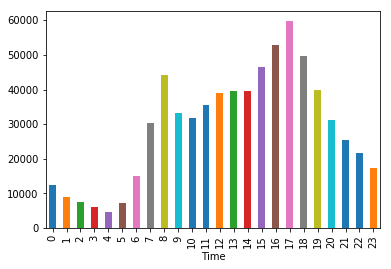

In [54]:
# bar graph of Time
TimeGraph = New_Accidents['Time'].astype("datetime64")
TimeGraph.dtype
TimeGraph.groupby(TimeGraph.dt.hour).count().plot(kind="bar")

The bar graph about time shows most accidents occur during rush hour (15:00-18:00).

Text(0,0.5,'')

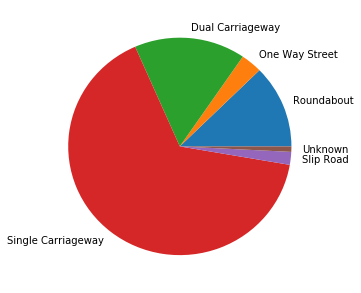

In [49]:
# pie chart of Road_Type
Road_Type_group = New_Accidents.groupby('Road_Type').size()
Road_Type_group
Road_Type_group.rename(index={1: "Roundabout", 2: "One Way Street", 3: "Dual Carriageway", 6: "Single Carriageway",
                             7: "Slip Road", 9: "Unknown", 12: "One Way Street/Slip Road"}, inplace = True)
Road_Type_group
plot = Road_Type_group.plot.pie(subplots=True, figsize=(5,5))
pylab.ylabel('') # remove the y label

From the pie chart about road type, we see most car accidents occurred on Single Carriageway roads. Also, Dual Carriageway roads and Roundabouts have a significant amount of accidents.

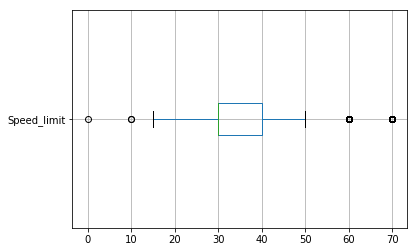

In [53]:
# boxplot of Speed_Limit
New_Accidents.boxplot(column='Speed_limit', vert = False)

From the boxplot about speed limit, we see that the 25th percentile is 30 mph and the 75th percentile is 40 mph, meaning that 50% of the car accidents occurred in this range. The data is fairly symmetric, meaning that there were a significant number of accidents occuring above and below this range too.

### Charts for Variables Related to Driving Conditions

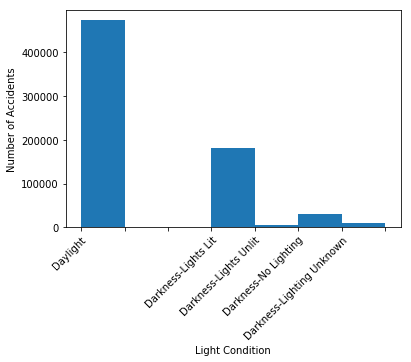

In [44]:
# histogram of Light_Conditions
names = ['Daylight', ' ', ' ', 'Darkness-Lights Lit', 'Darkness-Lights Unlit', 'Darkness-No Lighting', 
         'Darkness-Lighting Unknown']
fig, ax = plt.subplots() # tuple becomes fig and ax
ax.set_xticks((1, 2, 3, 4, 5, 6, 7, 8))
ax.set_xticklabels(names, rotation = 45, rotation_mode = "anchor", ha = "right")
plt.xlabel('Light Condition')
plt.ylabel('Number of Accidents')
plt.hist(New_Accidents['Light_Conditions'], bins=[1, 2, 3, 4, 5, 6, 7, 8])
plt.show();

From the histogram about light conditions, we see that most accidents occur in the daylight.

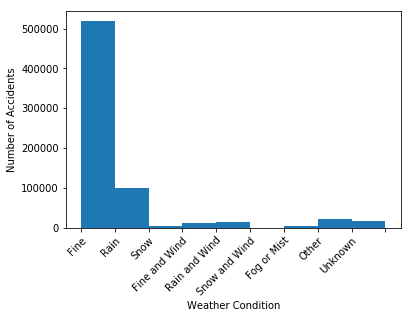

In [45]:
# histogram of Weather_Conditions
names = ['Fine', 'Rain', 'Snow', 'Fine and Wind', 'Rain and Wind', 'Snow and Wind', 'Fog or Mist', 'Other', 'Unknown']
fig, ax = plt.subplots() # tuple becomes fig and ax
ax.set_xticks((1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
ax.set_xticklabels(names, rotation = 45, rotation_mode = "anchor", ha = "right")
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.hist(New_Accidents['Weather_Conditions'], bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.show();

From the histogram about weather conditions, we learn most accidents occur when the weather was fine.

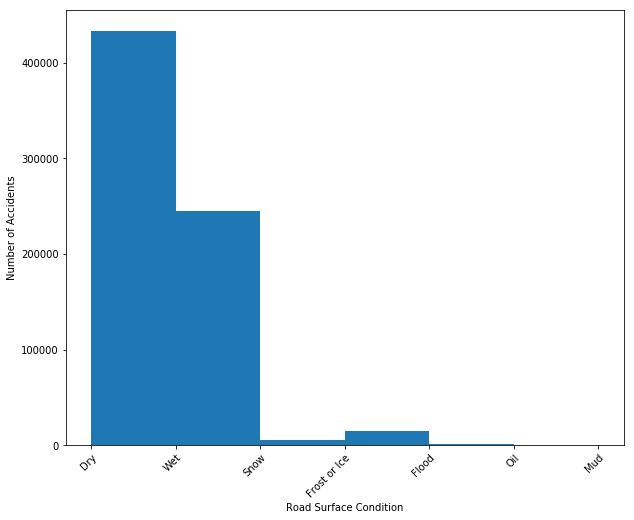

In [46]:
# histogram of Road_Surface_Conditions
names = ['Dry', 'Wet', 'Snow', 'Frost or Ice', 'Flood', 'Oil', 'Mud']
fig, ax = plt.subplots(figsize=(10,8)) # tuple becomes fig and ax
ax.set_xticks((1, 2, 3, 4, 5, 6, 7))
ax.set_xticklabels(names, rotation = 45, rotation_mode = "anchor", ha = "right")
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of Accidents')
plt.hist(New_Accidents['Road_Surface_Conditions'], bins=[1, 2, 3, 4, 5, 6, 7])
plt.show()

From the histogram about road surface conditions, we learn most accidents occur when the road is dry or wet.

Text(0,0.5,'')

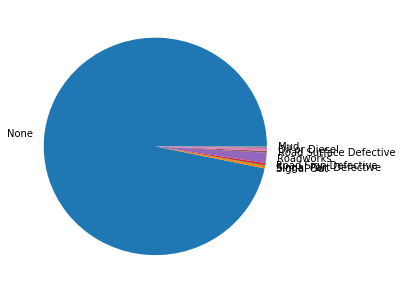

In [47]:
# pie chart of Special_Conditions_at_Site
Special_Conditions_at_Site_group = New_Accidents.groupby('Special_Conditions_at_Site').size()
Special_Conditions_at_Site_group
Special_Conditions_at_Site_group.rename(index={0: "None", 1: "Signal Out", 2: "Singal Part Defective", 
                                              3: "Road Sign Defective", 4: "Roadworks", 5: "Road Surface Defective",
                                              6: "Oil or Diesel", 7: "Mud"}, inplace = True)
Special_Conditions_at_Site_group
plot = Special_Conditions_at_Site_group.plot.pie(subplots=True, figsize=(5,5))
pylab.ylabel('') # remove the y label

From the pie chart about special conditions at site, we see most accidents occur when all safety elements at a site are in working order.

### Charts for Variables Related to the Accident

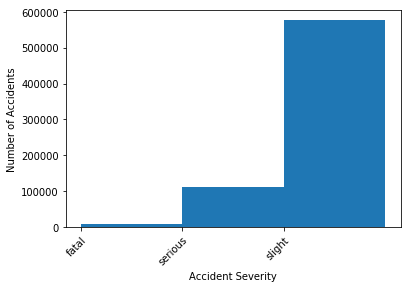

In [43]:
# histogram of Accident_Severity
names = ['fatal', 'serious', 'slight']
fig, ax = plt.subplots() # tuple becomes fig and ax
ax.set_xticks((1, 2, 3))
ax.set_xticklabels(names, rotation = 45, rotation_mode = "anchor", ha = "right")
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.hist(New_Accidents['Accident_Severity'], bins=[1, 2, 3, 4])
plt.show();

From the histogram about accident severity, we learn most accidents were slightly severe.

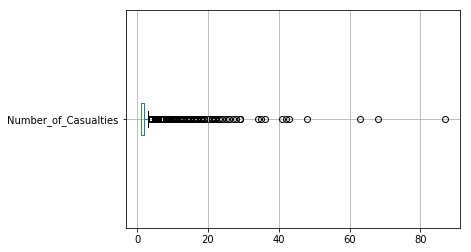

In [50]:
# boxplot of Number_of_Casualties
New_Accidents.boxplot(column='Number_of_Casualties', vert = False)

From the boxplot about number of casualties, we see that the data is skewed right. Therefore, in most accidents, there are a small number of casualties. However, there are some accidents that have many casualties. These accidents do not lie within the 75th percentile of the data, meaning they are unusual.

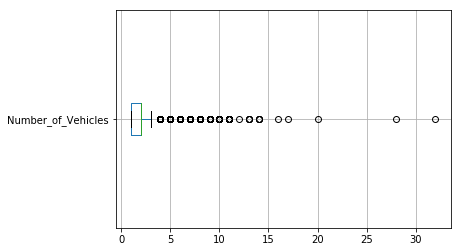

In [51]:
# boxplot of Number_of_Vehicles
New_Accidents.boxplot(column='Number_of_Vehicles', vert = False)

From the boxplot about number of vehicles, we see that the data is skewed right. In most instances, there are only a few cars involved in an accident. However, in some situations, there were a large number of cars involved in a car accident, but these data points are unusual.

### Charts for Variables Related to Pedestrians in the Accident

Text(0,0.5,'')

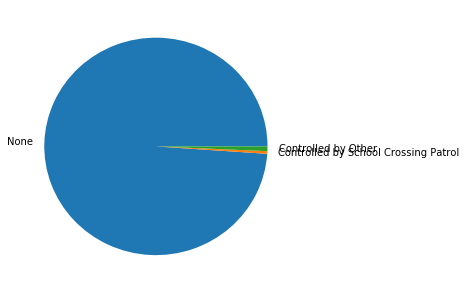

In [29]:
# pie chart of Pedestrian_Crossing_Human
Pedestrian_Crossing_Human_group = New_Accidents.groupby('Pedestrian_Crossing_Human').size()
Pedestrian_Crossing_Human_group
Pedestrian_Crossing_Human_group.rename(index={0: "None", 1: "Controlled by School Crossing Patrol",
                                             2: "Controlled by Other"}, inplace = True)
Pedestrian_Crossing_Human_group
plot = Pedestrian_Crossing_Human_group.plot.pie(subplots=True, figsize=(5,5))
pylab.ylabel('') # remove the y label

From the pie chart, we see if a pedestrian is involved in a car accident, usually there is not a crossing patrol officer present at the location. 

Text(0,0.5,'')

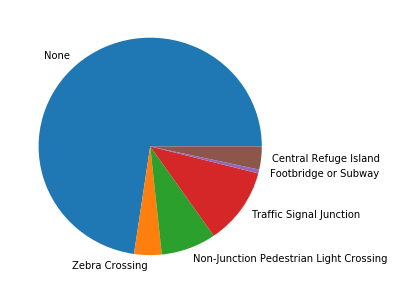

In [30]:
# pie chart of Pedestrian_Crossing_Physical
Pedestrian_Crossing_Physical_group = New_Accidents.groupby('Pedestrian_Crossing_Physical').size()
Pedestrian_Crossing_Physical_group
Pedestrian_Crossing_Physical_group.rename(index={0: "None", 1: "Zebra Crossing", 4: 
                                                "Non-Junction Pedestrian Light Crossing", 5: "Traffic Signal Junction",
                                               7: "Footbridge or Subway", 8: "Central Refuge Island"}, inplace = True)
Pedestrian_Crossing_Physical_group
plot = Pedestrian_Crossing_Physical_group.plot.pie(subplots=True, figsize=(5,5))
pylab.ylabel('') # remove the y label

From the pie chart, we see most accidents involving pedestrians occur when pedestrians are crossing a road where there is not markings, a traffic signal, or some other device to ensure cars are aware of pedestrians and will yield.

### Comparing Variables to Number of Casualties
Number of casualties is an important indicator about the severity of a car accident. I decided to explore this variable further by creating scatterplot.  

In [56]:
# distribution of Number_of_Casualties
New_Accidents.groupby('Number_of_Casualties').size()

Number_of_Casualties
1     489756
2     138728
3      44412
4      16457
5       6176
6       2251
7        732
8        305
9        163
10        83
11        57
12        27
13        20
14        13
15        10
16        10
17         7
18         9
19         6
20         1
21         6
22         6
23         2
24         3
25         1
26         2
27         1
28         1
29         3
34         1
35         1
36         1
41         1
42         1
43         1
48         1
63         1
68         1
87         1
dtype: int64

In [37]:
# statistical summary about Number_of_Casualties
pd.options.display.float_format = '{:.4f}'.format # ensure numeric, not scientific notation, is used
New_Accidents['Number_of_Casualties'].describe()

count   699258.0000
mean         1.4640
std          0.9202
min          1.0000
25%          1.0000
50%          1.0000
75%          2.0000
max         87.0000
Name: Number_of_Casualties, dtype: float64

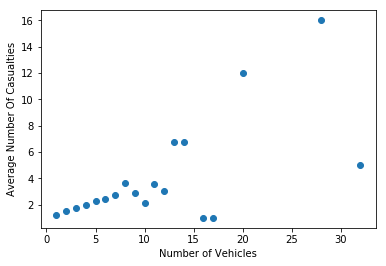

In [38]:
# scatterplot of Ave_Num_Casualties_Vehicles to Number_of_Vehicles
Ave_Num_Casualties_Vehicles = New_Accidents.groupby('Number_of_Vehicles')['Number_of_Casualties'].mean()
Ave_Num_Casualties_Vehicles
Num_Vehicles = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 20, 28, 32]
plt.scatter(Num_Vehicles, Ave_Num_Casualties_Vehicles)
plt.xlabel('Number of Vehicles')
plt.ylabel('Average Number Of Casualties')
plt.show()

The scatterplot shows there is a positive correlation between number of vehicles and average number of casualties. As the number of vehicles increases, we expect the average number of casualties to increase. 

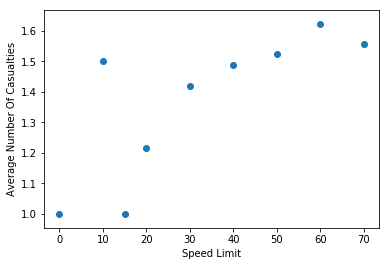

In [39]:
# compare averge number of casualties per speed limit to speed limit
Ave_Num_Casualties_Speed = New_Accidents.groupby('Speed_limit')['Number_of_Casualties'].mean()
Ave_Num_Casualties_Speed
Speed_Lims = [0, 10, 15, 20, 30, 40, 50, 60, 70]
plt.scatter(Speed_Lims, Ave_Num_Casualties_Speed)
plt.xlabel('Speed Limit')
plt.ylabel('Average Number Of Casualties')
plt.show()

The scatterplot shows there is a positive correlation between speed limit and average number of casualties. As the speed limit increases, we expect the average number of casualties to increase. 